In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
import seaborn as sns
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from mlxtend.plotting import plot_confusion_matrix
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.utils.vis_utils import plot_model
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras import layers
from tensorflow.keras import Model
# make a prediction for a new image.}
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
path=os.path.join('../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/PNEUMONIA')
print(path)

../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/PNEUMONIA


In [3]:
path=os.listdir('../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19')
print(path)

['train', 'test']


In [4]:
import os
print(os.listdir('../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train'))
print(os.listdir('../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test'))

['PNEUMONIA', 'NORMAL']
['PNEUMONIA', 'NORMAL']


In [5]:
train='../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train'
test='../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test'

In [6]:
train_normal=os.path.join(train, 'NORMAL')
train_pneumonia=os.path.join(train, 'PNEUMONIA')
test_normal=os.path.join(test, 'NORMAL')
test_pneumonia=os.path.join(test,'PNEUMONIA')

In [7]:
train_normal_frame=os.listdir(train_normal)
train_pneumonia_frame=os.listdir(train_pneumonia)

In [8]:
train_pneumonia_frame.sort()
print(train_pneumonia_frame[:10])
print('---------------------------------------------------------------------------------------------')
print(train_normal_frame[:10])

['01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg', '1-s2.0-S0140673620303706-fx1_lrg.jpg', '1-s2.0-S1684118220300608-main.pdf-001.jpg', '1-s2.0-S1684118220300608-main.pdf-002.jpg', '1-s2.0-S1684118220300682-main.pdf-002-a1.png', '1-s2.0-S1684118220300682-main.pdf-002-a2.png', '1-s2.0-S1684118220300682-main.pdf-003-b1.png', '1-s2.0-S1684118220300682-main.pdf-003-b2.png', '1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg', '171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg']
---------------------------------------------------------------------------------------------
['IM-0033-0001-0002.jpeg', 'IM-0035-0001.jpeg', 'NORMAL2-IM-0013-0001.jpeg', 'IM-0070-0001.jpeg', 'IM-0005-0001.jpeg', 'IM-0011-0001-0002.jpeg', 'IM-0093-0001.jpeg', 'IM-0050-0001.jpeg', 'IM-0073-0001.jpeg', 'NORMAL2-IM-0029-0001.jpeg']


In [9]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
pic_index = 0

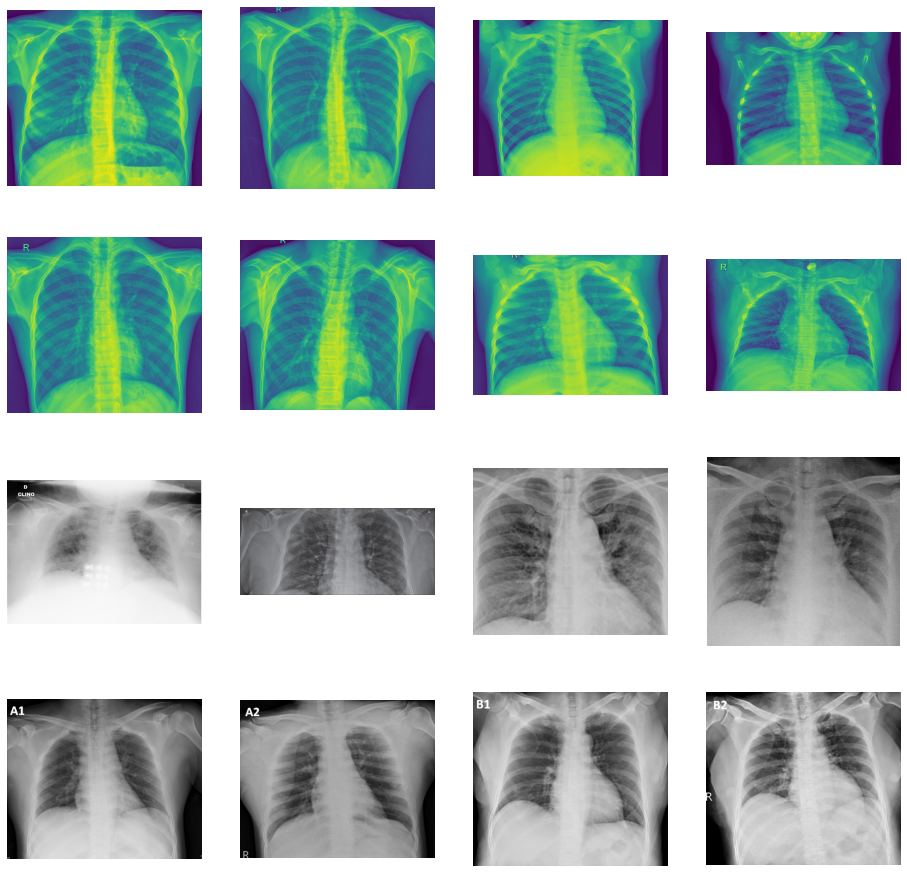

In [10]:
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
pic_index+=8
next_normal_pic=[os.path.join(train_normal,fname)
                 for fname in train_normal_frame[pic_index-8:pic_index]]
next_pneumonia_pic=[os.path.join(train_pneumonia,frame)
                    for frame in train_pneumonia_frame[pic_index-8:pic_index]]
for i,img_path in enumerate(next_normal_pic+next_pneumonia_pic):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img =mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [11]:
img_shape=layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(16, 3, activation='relu')(img_shape)
# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.MaxPooling2D(2)(x)
# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [12]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

In [13]:
x = layers.Dense(512, activation='relu')(x)

In [14]:
output = layers.Dense(1, activation='sigmoid')(x)

In [15]:
model = Model(img_shape, output)

In [16]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)       

In [17]:
model.compile(loss='binary',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [18]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 148 images belonging to 2 classes.


In [20]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        test,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 40 images belonging to 2 classes.


In [22]:
history=model.fit(train_generator,
epochs = 15,
validation_data = validation_generator
)

Epoch 1/15


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:749 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:187 __call__
        self.build(y_pred)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:140 build
        self._losses = nest.map_structure(self._get_loss_object, self._losses)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/nest.py:635 map_structure
        structure[0], [func(*x) for x in entries],
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/nest.py:635 <listcomp>
        structure[0], [func(*x) for x in entries],
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:263 _get_loss_object
        loss = losses_mod.get(loss)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:1895 get
        return deserialize(identifier)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:1854 deserialize
        printable_module_name='loss function')
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic_utils.py:378 deserialize_keras_object
        'Unknown ' + printable_module_name + ': ' + object_name)

    ValueError: Unknown loss function: binary


In [23]:
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(150,150))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1,150,150, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

In [24]:
# load an image and predict the class
	# load the image
img = load_image('../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg')
# predict the class
result = model.predict(img)
if(result[0]==1):
    print("PNEUMONIA")
else:
    print("NORMAL")

NORMAL


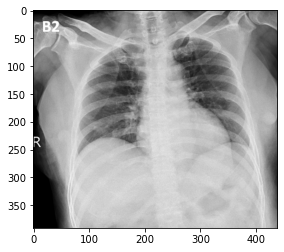

In [25]:
img =mpimg.imread(img_path)
plt.imshow(img)
plt.show()